<a href="https://colab.research.google.com/github/aarushisri/CustomerAnalysis/blob/main/BellaBeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [6]:
%%R
library(tidyverse)

Activity <- read.csv("/content/daily_Activity_merged.csv")
head(Activity)

          Id ActivityDate TotalSteps TotalDistance TrackerDistance
1 1503960366   04-12-2016      13162          8.50            8.50
2 1503960366    4/13/2016      10735          6.97            6.97
3 1503960366    4/14/2016      10460          6.74            6.74
4 1503960366    4/15/2016       9762          6.28            6.28
5 1503960366    4/16/2016      12669          8.16            8.16
6 1503960366    4/17/2016       9705          6.48            6.48
  LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance
1                        0               1.88                     0.55
2                        0               1.57                     0.69
3                        0               2.44                     0.40
4                        0               2.14                     1.26
5                        0               2.71                     0.41
6                        0               3.19                     0.78
  LightActiveDistance SedentaryAct

In [9]:
%%R

Calories <- read.csv("/content/dailyCalories_merged.csv")
head(Calories)

          Id ActivityDay Calories
1 1503960366   4/12/2016     1985
2 1503960366   4/13/2016     1797
3 1503960366   4/14/2016     1776
4 1503960366   4/15/2016     1745
5 1503960366   4/16/2016     1863
6 1503960366   4/17/2016     1728


In [10]:
%%R

Intensities <- read.csv("/content/dailyIntensities_merged.csv")
head(Intensities)

          Id ActivityDay SedentaryMinutes LightlyActiveMinutes
1 1503960366   4/12/2016              728                  328
2 1503960366   4/13/2016              776                  217
3 1503960366   4/14/2016             1218                  181
4 1503960366   4/15/2016              726                  209
5 1503960366   4/16/2016              773                  221
6 1503960366   4/17/2016              539                  164
  FairlyActiveMinutes VeryActiveMinutes SedentaryActiveDistance
1                  13                25                       0
2                  19                21                       0
3                  11                30                       0
4                  34                29                       0
5                  10                36                       0
6                  20                38                       0
  LightActiveDistance ModeratelyActiveDistance VeryActiveDistance
1                6.06                     0.5

In [11]:
%%R

Heartrate <- read.csv("/content/heartrate_seconds_merged.csv")
head(Heartrate)

          Id                 Time Value
1 2022484408 4/12/2016 7:21:00 AM    97
2 2022484408 4/12/2016 7:21:05 AM   102
3 2022484408 4/12/2016 7:21:10 AM   105
4 2022484408 4/12/2016 7:21:20 AM   103
5 2022484408 4/12/2016 7:21:25 AM   101
6 2022484408 4/12/2016 7:22:05 AM    95


In [12]:
%%R

Sleep <- read.csv("/content/sleepDay_merged.csv")
head(Sleep)

          Id              SleepDay TotalSleepRecords TotalMinutesAsleep
1 1503960366 4/12/2016 12:00:00 AM                 1                327
2 1503960366 4/13/2016 12:00:00 AM                 2                384
3 1503960366 4/15/2016 12:00:00 AM                 1                412
4 1503960366 4/16/2016 12:00:00 AM                 2                340
5 1503960366 4/17/2016 12:00:00 AM                 1                700
6 1503960366 4/19/2016 12:00:00 AM                 1                304
  TotalTimeInBed
1            346
2            407
3            442
4            367
5            712
6            320


In [13]:
%%R

Weight <- read.csv("/content/weightLogInfo_merged.csv")
head(Weight)

          Id                  Date WeightKg WeightPounds Fat   BMI
1 1503960366  5/2/2016 11:59:59 PM     52.6     115.9631  22 22.65
2 1503960366  5/3/2016 11:59:59 PM     52.6     115.9631  NA 22.65
3 1927972279  4/13/2016 1:08:52 AM    133.5     294.3171  NA 47.54
4 2873212765 4/21/2016 11:59:59 PM     56.7     125.0021  NA 21.45
5 2873212765 5/12/2016 11:59:59 PM     57.3     126.3249  NA 21.69
6 4319703577 4/17/2016 11:59:59 PM     72.4     159.6147  25 27.45
  IsManualReport        LogId
1           True 1.462234e+12
2           True 1.462320e+12
3          False 1.460510e+12
4           True 1.461283e+12
5           True 1.463098e+12
6           True 1.460938e+12


In [25]:
%%R


daily_activity <- read.csv("/content/daily_Activity_merged.csv")
n_distinct(daily_activity$Id)


[1] 33


In [26]:
%%R

sleep_day <- read.csv("/content/sleepDay_merged.csv")
n_distinct(sleep_day$Id)

[1] 24


In [27]:
%%R
nrow(daily_activity)

[1] 940


In [28]:
%%R
nrow(sleep_day)

[1] 413


In [30]:
%%R
daily_activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :1440.0  


In [31]:
%%R
sleep_day %>%  
  select(TotalSleepRecords,
  TotalMinutesAsleep,
  TotalTimeInBed) %>%
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  


R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



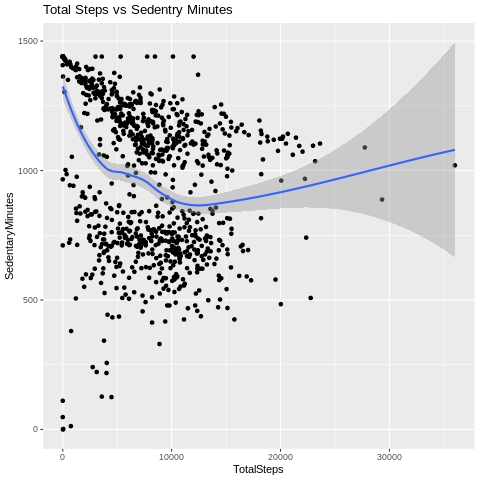

In [45]:
%%R
ggplot(data=daily_activity, aes(x=TotalSteps, y=SedentaryMinutes)) + geom_point() + geom_smooth() + labs(title="Total Steps vs Sedentry Minutes")

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



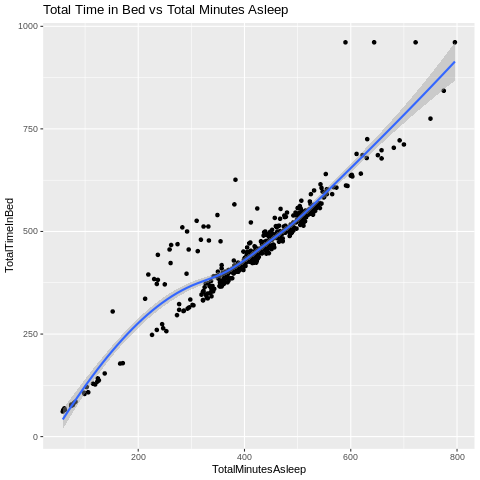

In [46]:
%%R
ggplot(data=sleep_day, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + geom_point() + geom_smooth() +labs(title="Total Time in Bed vs Total Minutes Asleep")

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



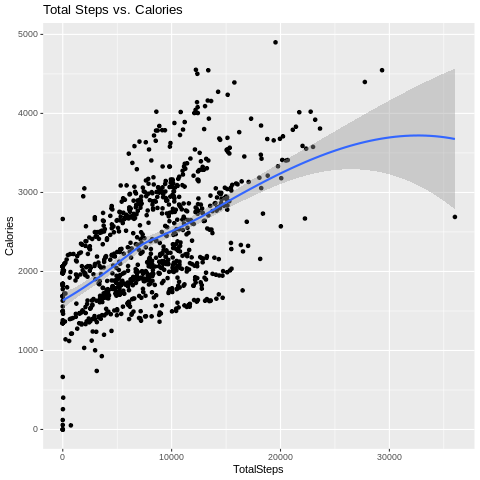

In [47]:
%%R
ggplot(data=Activity, aes(x=TotalSteps, y=Calories)) +
geom_point() + geom_smooth() + labs(title="Total Steps vs. Calories")

In [36]:
%%R

# activity
daily_activity$ActivityDate=as.POSIXct(daily_activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
daily_activity$date <- format(daily_activity$ActivityDate, format = "%m/%d/%y")
# sleep
sleep_day$SleepDay=as.POSIXct(sleep_day$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep_day$date <- format(sleep_day$SleepDay, format = "%m/%d/%y")

merged_data <- merge(sleep_day, daily_activity, by=c('Id', 'date'))
head(merged_data)

          Id     date   SleepDay TotalSleepRecords TotalMinutesAsleep
1 1503960366 04/13/16 2016-04-13                 2                384
2 1503960366 04/15/16 2016-04-15                 1                412
3 1503960366 04/16/16 2016-04-16                 2                340
4 1503960366 04/17/16 2016-04-17                 1                700
5 1503960366 04/19/16 2016-04-19                 1                304
6 1503960366 04/20/16 2016-04-20                 1                360
  TotalTimeInBed ActivityDate TotalSteps TotalDistance TrackerDistance
1            407   2016-04-13      10735          6.97            6.97
2            442   2016-04-15       9762          6.28            6.28
3            367   2016-04-16      12669          8.16            8.16
4            712   2016-04-17       9705          6.48            6.48
5            320   2016-04-19      15506          9.88            9.88
6            377   2016-04-20      10544          6.68            6.68
  LoggedActiv

In [37]:
%%R

n_distinct(merged_data$Id)

[1] 24


In [39]:
%%R
restless_added <-  mutate(merged_data, restless_sleep = TotalTimeInBed-TotalMinutesAsleep)

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



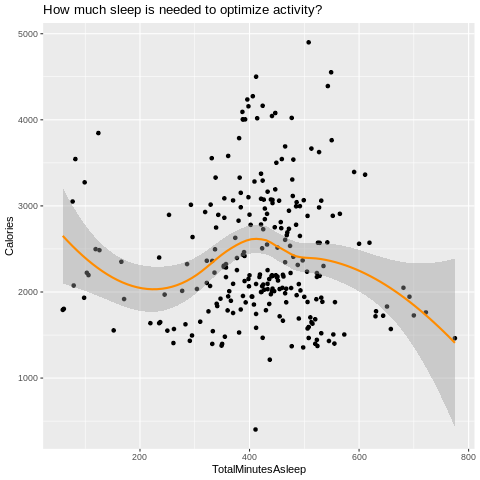

In [40]:
%%R

ggplot(data=restless_added, aes(x=TotalMinutesAsleep, y=Calories)) + 
  geom_point() + geom_smooth(color = "dark orange") + labs(title="How much sleep is needed to optimize activity?")

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



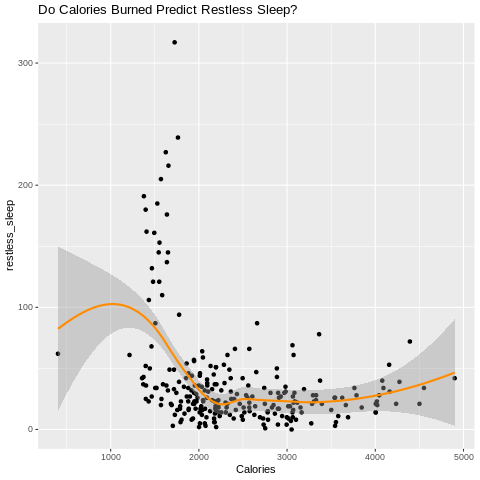

In [41]:
%%R

ggplot(data=restless_added, aes(x=Calories, y=restless_sleep)) + 
  geom_point() + geom_smooth(color = "dark orange") + labs(title="Do Calories Burned Predict Restless Sleep?")